In [11]:
import numpy as np
from ConcaveHull import ConcaveHull

ch = ConcaveHull()
pts = np.random.uniform(size=(40, 2))
ch.loadpoints(pts)
ch.calculatehull()

boundary_points = np.vstack(ch.boundary.exterior.coords.xy).T
# boundary_points is a subset of pts corresponding to the concave hull

In [15]:
type(boundary_points)

numpy.ndarray

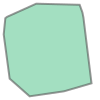

In [13]:
ch.boundary

In [14]:
pts

array([[0.90430349, 0.12242621],
       [0.85252158, 0.7040471 ],
       [0.68836103, 0.7714731 ],
       [0.21562188, 0.62278628],
       [0.59215089, 0.47231707],
       [0.80761694, 0.66099714],
       [0.90013441, 0.8215307 ],
       [0.62038686, 0.26050191],
       [0.88963153, 0.87320238],
       [0.23864351, 0.4543193 ],
       [0.48131559, 0.68221604],
       [0.22132622, 0.52467677],
       [0.45890481, 0.15088534],
       [0.41048253, 0.96323821],
       [0.37338575, 0.29305826],
       [0.69903888, 0.05429862],
       [0.07314349, 0.64447961],
       [0.61295943, 0.44959031],
       [0.1348905 , 0.18539002],
       [0.51517541, 0.39874487],
       [0.12468541, 0.54979498],
       [0.3422601 , 0.00239503],
       [0.86114224, 0.95184262],
       [0.6175027 , 0.22505598],
       [0.55889184, 0.65162229],
       [0.77008123, 0.50938741],
       [0.56833701, 0.04519166],
       [0.25468146, 0.7620164 ],
       [0.08991261, 0.81262956],
       [0.26542103, 0.84174157],
       [0.

In [47]:
import pylas # to read in the point cloud
import pdal
import geopandas as gpd
import json

In [48]:
str_convex_hull_ar = r'D:\concave_hull_test_20230220\convex_hull_dfw_3857_ar.shp'
str_copc_point_cloud = r'D:\globus_transfer\bridge_merge_pecos_dallas\bridge_merge_pecos_dallas.copc.laz'

# read the "area of interest" shapefile in to geopandas dataframe
gdf_convex_hulls = gpd.read_file(str_convex_hull_ar)

In [49]:
# get all the points inside the id = 2004 polygon
gdf_single_convex = gdf_convex_hulls.loc[gdf_convex_hulls['id'] == 2004]

In [51]:
# get all the points inside the polygon

str_boundary_wkt = gdf_single_convex.iloc[0].geometry.wkt
str_output_las = r'D:\concave_hull_test_20230220\bridge_2004.las'

In [57]:
pipeline_create_copc = {
    "pipeline": [
        {   
            "filename":str_copc_point_cloud,
            "type":"readers.copc",
            "tag":"readdata"
        },
        {
            "type":"filters.crop",
            "polygon":str_boundary_wkt,
            "tag":"filter"
        },
        {
            "filename": str_output_las,
            "inputs": [ "filter" ],
            "type": "writers.las"
        }
    ]}

In [58]:
#execute the pdal pipeline
pipeline = pdal.Pipeline(json.dumps(pipeline_create_copc))
n_points = pipeline.execute()

RuntimeError: Couldn't create reader stage of type 'readers.copc'.
You probably have a version of PDAL that didn't come with a plugin
you're trying to load.  Please see the FAQ at https://pdal.io/faq